<h3>1. Import module yang dibutuhkan</h3>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [7]:
imagePaths = 'dataset\\animal_elw\\'
label_list = ['elephant', 'lion', 'wolf']
data = []
labels = []

In [8]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)
        labels.append(label)

In [9]:
np.array(data).shape

(300, 3072)

<h3>3. Data Preprocessing</h3>

In [10]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [11]:
print(labels)

['elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'eleph

In [12]:
# ubah nilai dari labels menjadi binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

<h3>4. Split Dataset</h3>

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [14]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (240, 3072)
Ukuran data test = (60, 3072)


<h3>5. Build ANN Architecture</h3>

In [15]:
# buat ANN dengan arsitektur input layer (3072) - hidden layer (512) - hidden layer (1024) - output layer (3)
model = Sequential()
model.add(Dense(512, input_shape=(3072,), activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(len(label_list), activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 2,101,763
Trainable params: 2,101,763
Non-trainable params: 0
_________________________________________________________________


In [17]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [18]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [19]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
8/8 [==============================] - 1s 40ms/step - loss: 1.0421 - accuracy: 0.3917 - val_loss: 0.8912 - val_accuracy: 0.5667
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.8812 - accuracy: 0.6083 - val_loss: 0.8134 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 0.8123 - accuracy: 0.6542 - val_loss: 0.8908 - val_accuracy: 0.5500
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 0.8197 - accuracy: 0.5750 - val_loss: 0.7233 - val_accuracy: 0.7000
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.7058 - accuracy: 0.7375 - val_loss: 0.6875 - val_accuracy: 0.7000
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 0.6908 - accuracy: 0.6792 - val_loss: 0.7521 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 17ms/step - loss: 0.6745 - accuracy: 0.7375 - val_loss: 0.6762 - val_accuracy: 0.7167
Epoch 8/100
8/8 [===

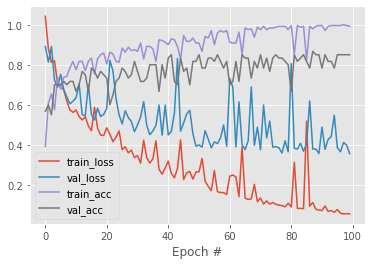

In [20]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [21]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=label_list))

              precision    recall  f1-score   support

    elephant       0.95      0.91      0.93        22
        lion       0.75      0.75      0.75        16
        wolf       0.83      0.86      0.84        22

    accuracy                           0.85        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



In [22]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_elephant.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32)).flatten()
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
i = q_pred.argmax(axis=1)[0]
label = lb.classes_[i]

In [24]:
text = "{}: {:.2f}%".format(label, q_pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Output' in function 'cvDestroyWindow'
